# <font color = "Orange">SOME ACTIVATION FUNCTIONS</font>

In [13]:
import math as m
import matplotlib.pyplot as plt

## Sigmoid Function

In [10]:
def sigmoid(x):
    return 1 / (1 + m.exp(-x))

In [30]:
values_of_sigmoid = []
values_of_x = []
for i in range(-500,500,1):
    i = i*0.01
    values_of_x.append(i)
    values_of_sigmoid.append(sigmoid(i))

Text(0, 0.5, 'value of sigmoid')

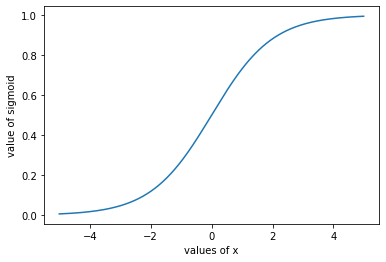

In [31]:
plt.plot( values_of_x ,values_of_sigmoid)
plt.xlabel("values of x")
plt.ylabel("value of sigmoid")

## TanH Function

In [32]:
def tanh(x):
    return (m.exp(x) - m.exp(-x)) / (m.exp(x) + m.exp(-x))

In [37]:
values_of_tanh = []
values_of_x = []
for i in range(-500,500,1):
    i = i*0.001
    values_of_x.append(i)
    values_of_tanh.append(tanh(i))

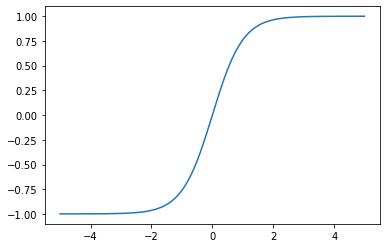

In [36]:
plt.plot(values_of_x,values_of_tanh)

## ReLU Function

In [38]:
def ReLU(x):
    return max(0,x)

In [42]:
values_of_relu = []
values_of_x = []
for i in range(-500,500,1):
    i = i*0.01
    values_of_x.append(i)
    values_of_relu.append(ReLU(i))

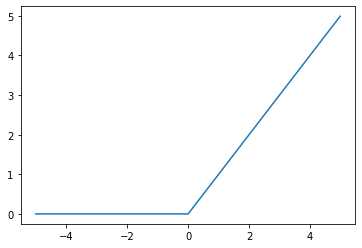

In [46]:
plt.plot(values_of_x,values_of_relu)

# Leaky ReLU Function

In [47]:
def leaky_ReLU(x):
    return max(0.1*x,x)

In [48]:
values_of_L_relu = []
values_of_x = []
for i in range(-500,500,1):
    i = i*0.01
    values_of_x.append(i)
    values_of_L_relu.append(leaky_ReLU(i))

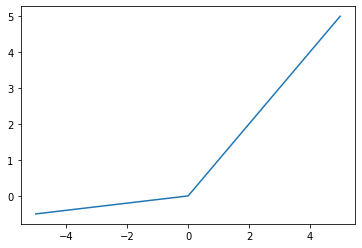

In [49]:
plt.plot(values_of_x,values_of_L_relu)

## ELU

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

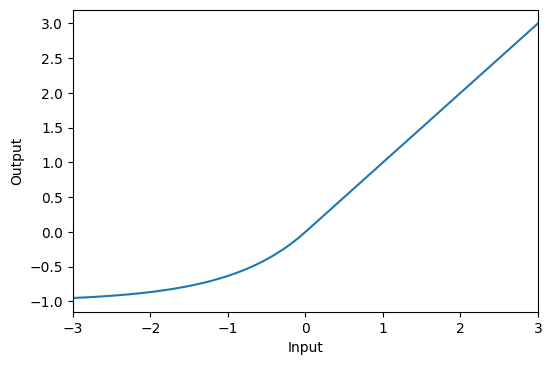

In [84]:
activation_elu = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_elu(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## SELU

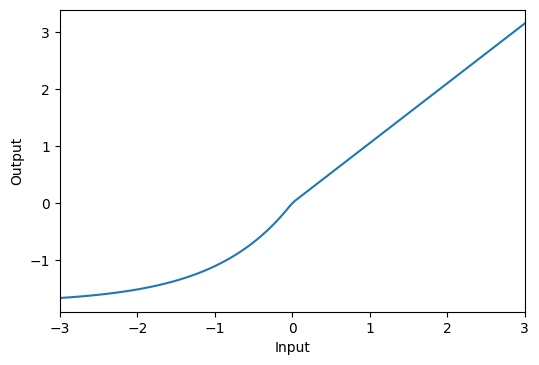

In [86]:
activation_selu = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_selu(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Swish

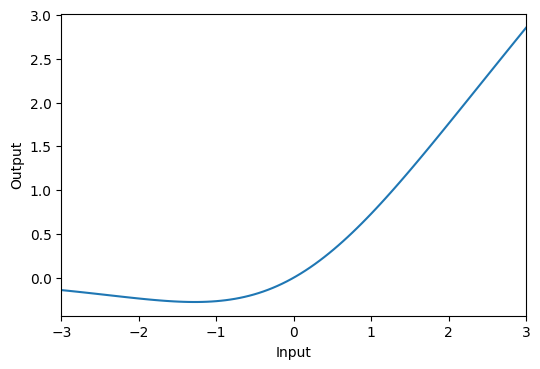

In [87]:
activation_swish = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_swish(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# <font color = "red">SOME LOSS FUNCTIONS</font>

In [52]:
import numpy as np

y_predicted = np.array([1,1,0,1,0,0])
y_true = np.array([0.30,0.70,0.50,0.90,0.87,0.11])
print(y_predicted,y_true)

[1 1 0 1 0 0] [0.3  0.7  0.5  0.9  0.87 0.11]


## Mean absolute error (MAE)

\begin{align}
MeanAbsoluteError = 1/n(\sum_{}^{} \left | y\hat{}- y \right |)
\end{align}

In [55]:
def MAE(y_predicted,y_true):
    total_error = 0
    for yt,yp in zip(y_true,y_predicted):
        total_error = abs(yt - yp) 
    print("total error is: ",total_error)
    return total_error/ len(y_true)

In [56]:
MAE(y_predicted,y_true)

total error is:  0.11


0.018333333333333333

## Mean Square Error (MSE)

\begin{align}
MeanSquareError = 1/n(\sum_{}^{} (y\hat{}- y)^2)
\end{align}

In [58]:
def MSE(y_predicted,y_true):
    total_error = 0
    for yt,yp in zip(y_true,y_predicted):
        total_square_error = abs(yt - yp) 
    return (total_square_error)**2 / len(y_true)

In [59]:
MSE(y_predicted,y_true)

0.0020166666666666666

In [61]:
np.log(0.0001)

-9.210340371976182

## Binary Cross Entropy or Log error

In [69]:
eps = 1e-15

In [70]:
y_predicted_new = [max(i,eps) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1, 1e-15, 1e-15]

In [71]:
y_predicted_new = [min(i,1 - eps) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 0.999999999999999, 1e-15, 1e-15]

In [73]:
np.log(y_predicted)

<ipython-input-73-d8d657355a01>:1: RuntimeWarning: divide by zero encountered in log
  np.log(y_predicted)


array([  0.,   0., -inf,   0., -inf, -inf])

### to avoid this error we did some manipulation as log(0) is undefined

\begin{align}
Binary Cross Entropy = -1/n{ \sum_{i=0 }^{n} y.logy\hat{} + (1-y).log(1-y\hat{}) }
\end{align}